In [7]:
!pip install numpy matplotlib pandas


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\anuz\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [28]:
np.random.seed(2)
df = pd.read_csv('dataset.csv')

In [29]:
df.head()

,x1,x2,target
0,1.065701,1.645795,1.0
1,0.112153,1.005711,1.0
2,-1.469113,0.598036,1.0
3,-1.554499,1.034249,1.0
4,-0.097040,-0.146800,0.0


In [11]:
df.shape

(200, 3)

Text(0.5, 1.0, 'Distribution of the target variable')

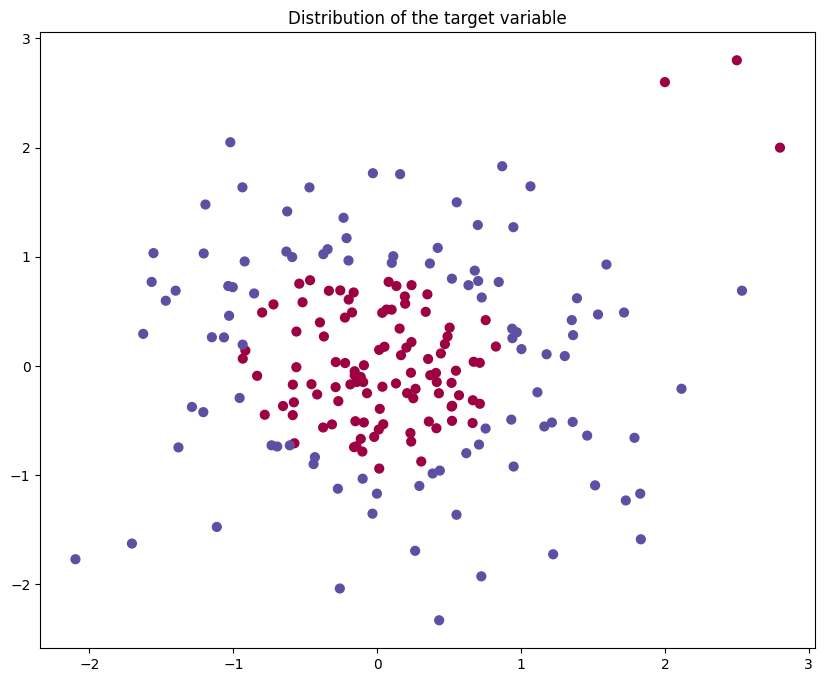

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(df['x1'], df['x2'],c=df['target'].values.reshape(200,),s=40,cmap=plt.cm.Spectral)
plt.title('Distribution of the target variable')


In [31]:
def sigmoid(z):
    return 1/(1 +np.exp(-z))

In [32]:
def plot_decision_boundary(W1, b1, W2, b2, X, Y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    A1 = np.tanh(np.dot(W1, np.c_[xx.ravel(), yy.ravel()].T) + b1)
    A2 = sigmoid(np.dot(W2, A1) + b2)
    Z = (A2 > 0.5).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=Y.reshape(200,), cmap=plt.cm.Spectral)
    plt.show()


In [42]:
def train(h=4):

    #Model training
    X = df[['x1', 'x2']].values.T #T means transpose
    Y = df['target'].values.reshape(1, -1)
    m = X.shape[1]
    n_x, n_h, n_y = 2, h, 1 # number of inputs, no of hidden layers, no of outputs
    num_of_iters = 1000 #epoch
    learning_rate = 4 #Learning rate


    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1)) #b means to remove zero or zero hatauna ko lagi
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))


    for i in range(num_of_iters):

        #forward propagation
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)

        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        cost = -np.sum(Y * np.log(A2) + (1-Y) * np.log(1-A2)) / m



        #Backpropagation
        dZ2 = A2 - Y
        dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
        
        #Gradient Descent
        W2 = W2 -learning_rate * np.dot(dZ2, A1.T) / m
        b2 = b2 - learning_rate * np.sum(dZ2, axis=1, keepdims=True) / m

        W1 = W1 -learning_rate * np.dot(dZ1, X.T) / m
        b1 = b1 - learning_rate * np.sum(dZ1, axis=1, keepdims=True) / m

        if i % 100 == 0:
            print(f'Cost after iterations {i}: {cost}')
        
        plt.title("Hidden Layer of size %d" %h)
    plot_decision_boundary(W1, b1, W2, b2, X, Y)

Cost after iterations 0: 1.124277622384045
Cost after iterations 100: 0.15397841212841057
Cost after iterations 200: 0.1568490719011141
Cost after iterations 300: 0.055371365876059946
Cost after iterations 400: 0.04104258664858853
Cost after iterations 500: 0.03337189379379914
Cost after iterations 600: 0.03807915598752756
Cost after iterations 700: 0.029795452281418423
Cost after iterations 800: 0.025559555868841465
Cost after iterations 900: 0.02269040233002998


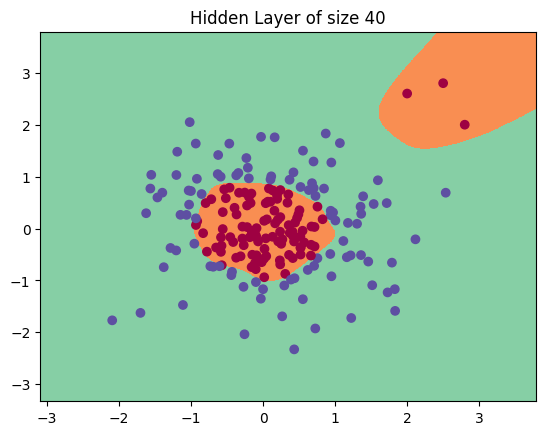

In [44]:
train(40)